In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [ ]:
data = pd.read_csv('Rainfall.csv')

In [ ]:
data.shape

(366, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
data= data.drop(columns=['day'])

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])

In [ ]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [ ]:
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    object 
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [ ]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [ ]:
data['rainfall']= data['rainfall'].map({"yes":1,"no":0})

In [ ]:
data['rainfall'].unique()

array([1, 0])

In [ ]:
sns.set(style="whitegrid")

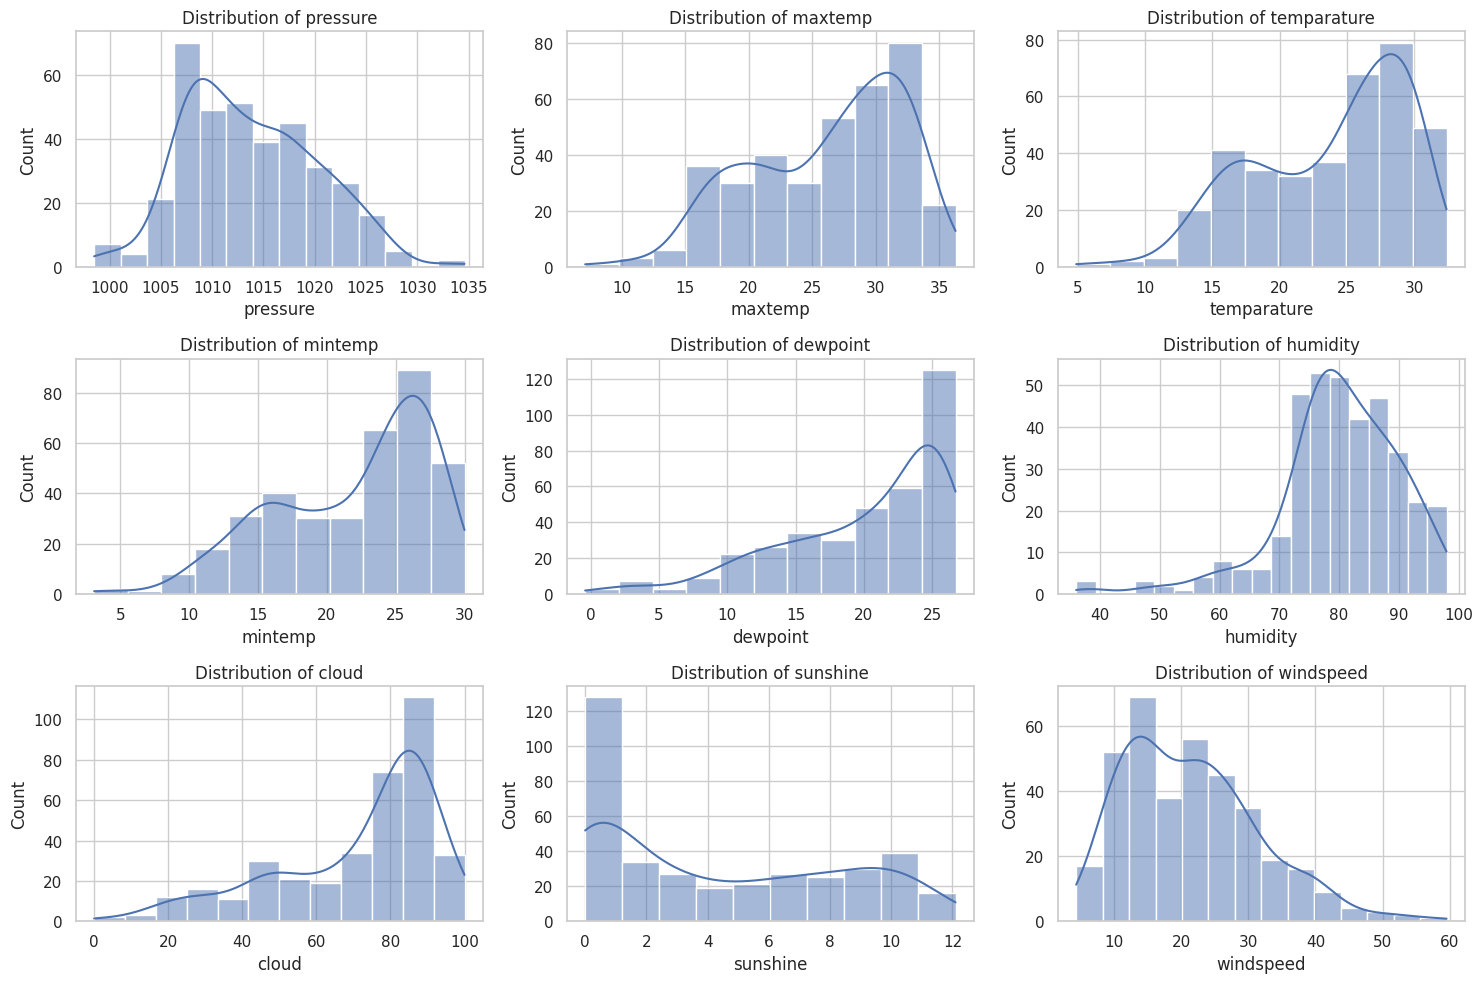

In [ ]:
plt.figure(figsize=(15,10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(data[column],kde = True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

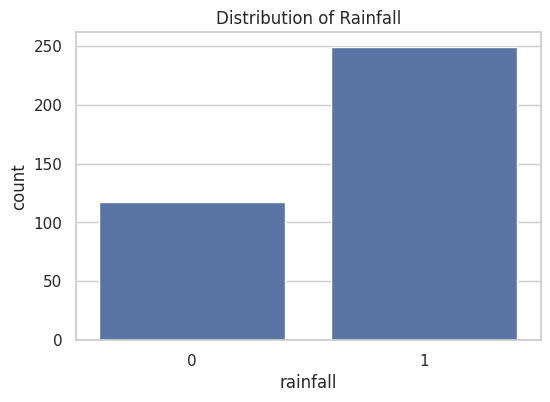

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=data)
plt.title("Distribution of Rainfall")
plt.show()

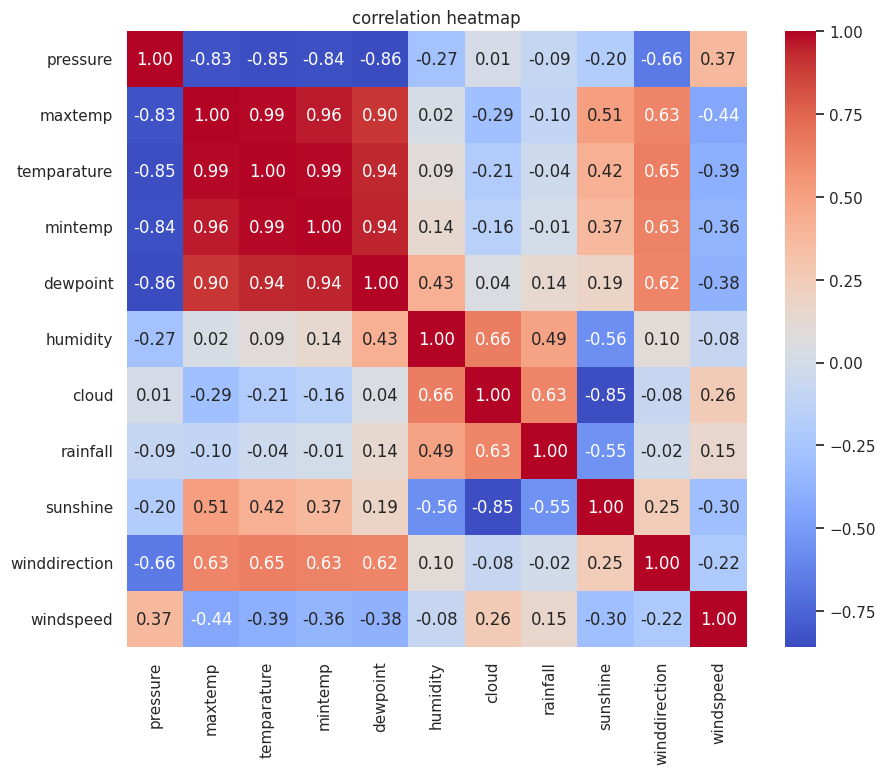

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()

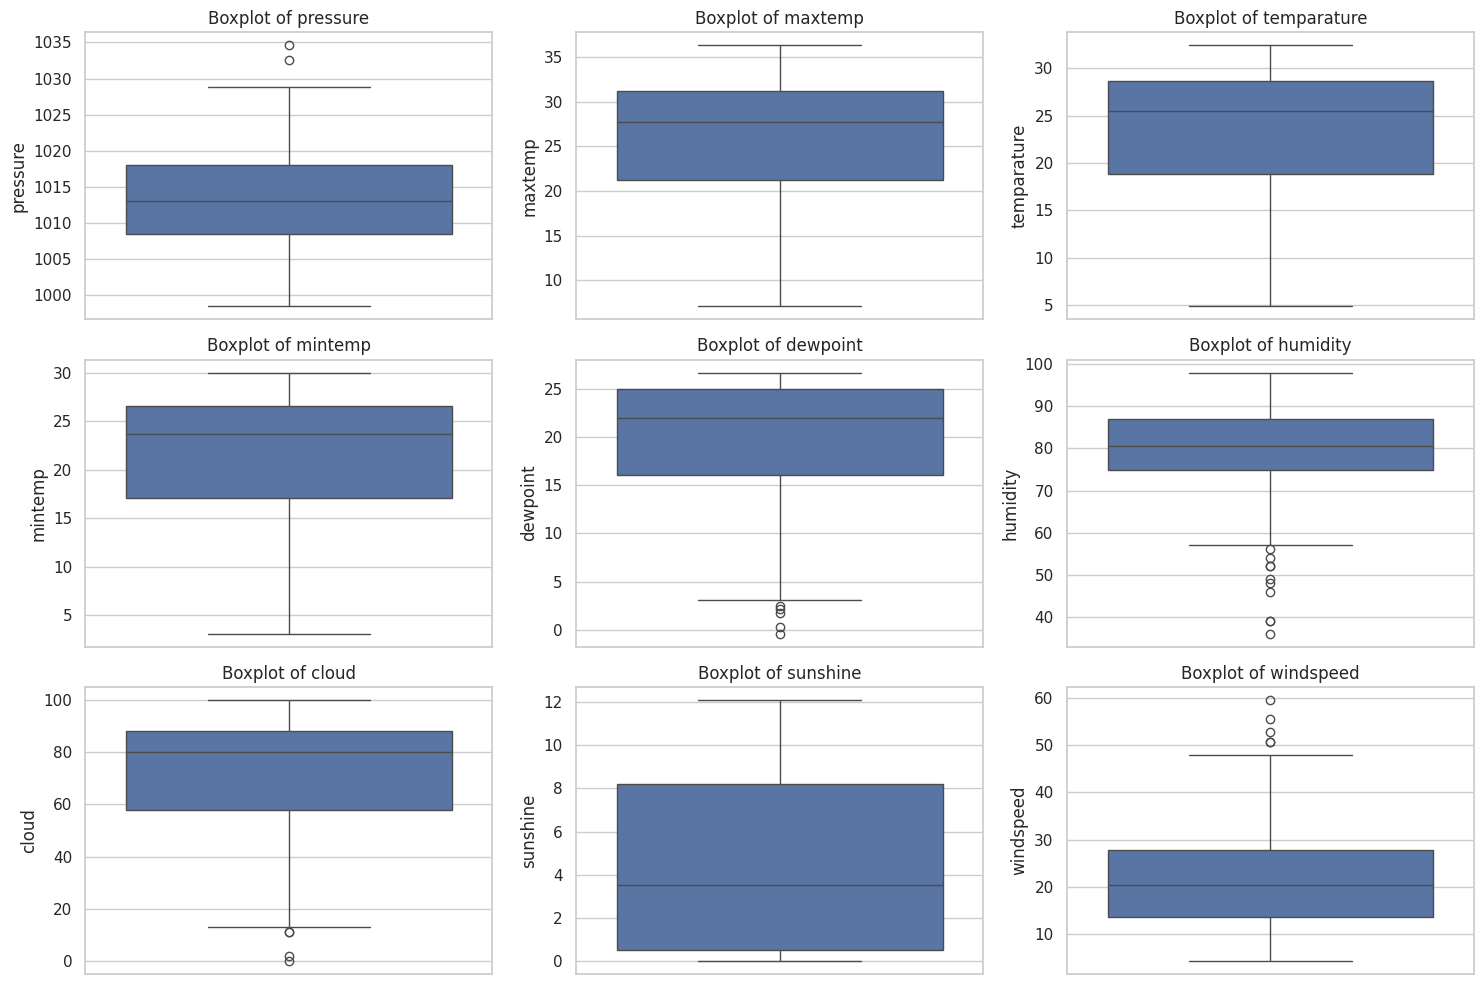

In [ ]:
plt.figure(figsize=(15,10))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [ ]:
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [ ]:
data['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [ ]:
df_majority = data[data["rainfall"]==1]
df_minority = data[data["rainfall"]==0]


In [ ]:
print(df_majority.shape)
df_minority.shape

(249, 8)


(117, 8)

In [ ]:
df_minority_downsample = resample(df_majority, replace= False, n_samples = len(df_minority),random_state=12)

In [ ]:
df_minority_downsample.shape

(117, 8)

In [ ]:
df_downsample = pd.concat([df_minority_downsample,df_minority])
df_downsample

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
302,1018.2,22.9,81,61,1,7.0,90.0,24.2
48,1021.9,11.8,89,95,1,0.0,40.0,18.6
74,1017.1,11.1,79,94,1,0.0,70.0,38.0
78,1013.0,21.4,94,85,1,1.5,40.0,12.5
358,1016.8,20.7,91,70,1,6.0,40.0,9.4
...,...,...,...,...,...,...,...,...
351,1025.9,-0.4,39,25,0,9.1,20.0,35.6
352,1026.4,3.1,48,11,0,9.5,40.0,25.2
353,1025.4,8.7,62,71,0,2.1,30.0,29.0
360,1020.6,13.3,74,87,0,0.6,30.0,21.6


In [ ]:
df_downsample = df_downsample.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
df_downsample['rainfall'].value_counts()

,count
rainfall,
1,117
0,117


In [ ]:
X= df_downsample.drop(columns=['rainfall'])
Y= df_downsample['rainfall']

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf ={
    'n_estimators':[50,100,200],
    "max_features":['sqrt',"log2"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [ ]:
grid_search_rf = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf, cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameters for random forest",grid_search_rf.best_params_)

best parameters for random forest {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
cv_scores = cross_val_score(best_rf_model,x_train,y_train,cv=5)
print("cross validation scores for random forest",cv_scores)
print("mean cross validation score for random forest",np.mean(cv_scores))


cross validation scores for random forest [0.76315789 0.84210526 0.7027027  0.78378378 0.89189189]
mean cross validation score for random forest 0.7967283072546231


In [ ]:
y_pred = best_rf_model.predict(x_test)

print("test set accuracy:",accuracy_score(y_test,y_pred))
print("test set confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))

test set accuracy: 0.7021276595744681
test set confusion matrix:
 [[16  8]
 [ 6 17]]
classification report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       0.68      0.74      0.71        23

    accuracy                           0.70        47
   macro avg       0.70      0.70      0.70        47
weighted avg       0.70      0.70      0.70        47



In [ ]:
x_test.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [ ]:
input_data = (1015,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data],columns=x_test.columns)

In [ ]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015,19.9,95,81,0.0,40.0,13.7


In [ ]:
predication  = best_rf_model.predict(input_df)
print('predication result:','Rainfall' if predication[0]==1 else 'No Rainfall')

predication result: Rainfall


In [ ]:
model_data = {'model':best_rf_model,'feature_name': x_test.columns.tolist()}
with open('model.pkl','wb') as file:
    pickle.dump(model_data,file)